# Implementacion TreeMap (BETA)

- **Nicolas Pastor Bueno**. <npastorb@udd.cl>, 
- **Maria Alejandra Hermosilla Urriola**. <@udd.cl>, 
- **Cesar Patricio Diaz Ramos**. <@udd.cl>. 

Creado: **16 de octubre de 2021**.

El objetivo de este notebook es poder demotrar implementaciones en TreeMap a traves de 'AVES' y con dependenia de SQUARIFY.PY

In [ ]:
!pip uninstall matplotlib -y
!pip install -q condacolab
import condacolab
condacolab.install_mambaforge()

!git clone https://github.com/napb/aves.git aves_git
!mamba env update --name base --file aves_git/environment-colab.yml

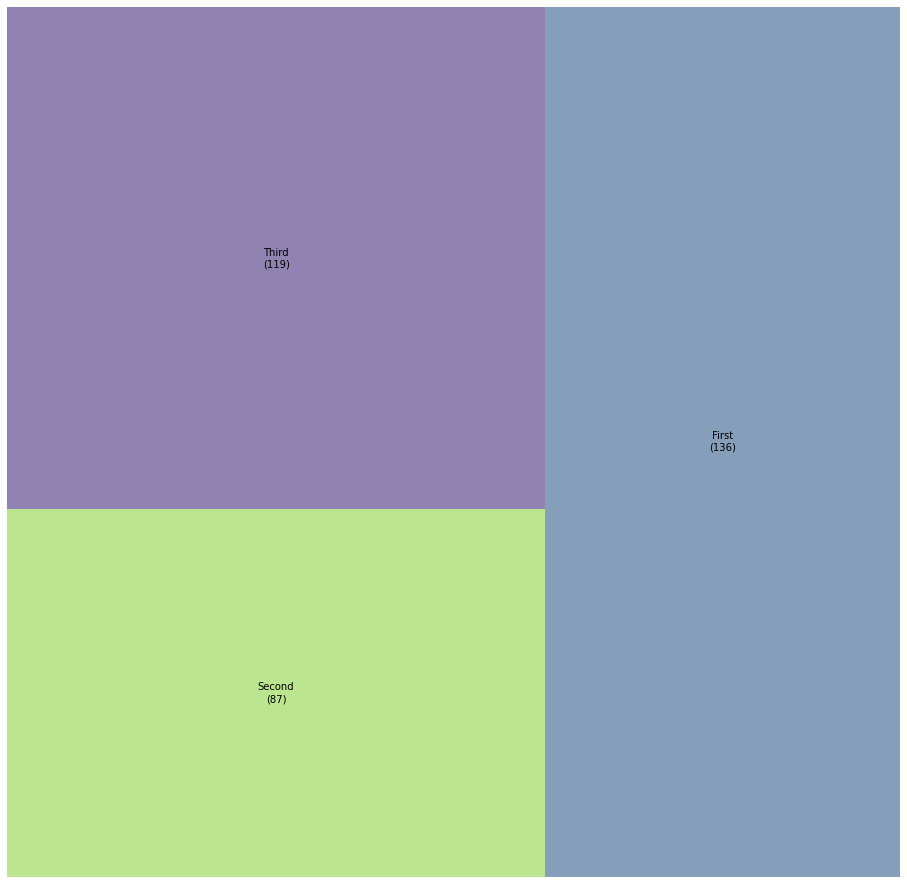

In [5]:
'''
Con la implementacion del metodo drawTreeMapSumAggr(dataFrame, columna_de_agrupacion, columna_de_agregacion, impresion_de_margenes, leyenda) dentro de 
aves, podemos renderizar un treemap

    * Se define seaborn solo para cargar el dataset titanic, a modo de prueba para un treemap
'''

import seaborn as sns
titanic = sns.load_dataset('titanic')
from aves.visualization.treemap import drawTreeMapSumAggr
 
drawTreeMapSumAggr(
    titanic,
    'class',
    'survived',
    False,
    False,
    "legend_class_aggr",
    16,
    16,
    False, 
    None)

In [26]:
import sys
from pathlib import Path
from aves.data import eod

AVES_ROOT = Path("..") if not "google.colab" in sys.modules else Path("aves_git")

EOD_PATH = AVES_ROOT / "data" / "external" / "EOD_STGO"
EOD_PATH

viajes = eod.read_trips(EOD_PATH)
personas = eod.read_people(EOD_PATH)
viajes_persona = viajes.merge(personas)
#viajes_persona



In [27]:
viajes_persona

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,FactorPersona
0,173431,17343102,1734310202,1,Maipú,Maipú,Poniente,Poniente,400,407,...,NaN,0,0,0,142.3375,NaN,NaN,NaN,NaN,53.39174
1,173431,17343102,1734310201,1,Maipú,Maipú,Poniente,Poniente,407,400,...,NaN,0,0,0,142.3375,NaN,NaN,NaN,NaN,53.39174
2,173441,17344101,1734410101,2,Maipú,Las Condes,Poniente,Oriente,407,307,...,Entre 200.001 y 400.000 pesos,350000,2,0,112.9581,NaN,NaN,NaN,NaN,46.32137
3,173441,17344101,1734410102,2,Las Condes,Maipú,Oriente,Poniente,307,407,...,Entre 200.001 y 400.000 pesos,350000,2,0,112.9581,NaN,NaN,NaN,NaN,46.32137
4,173441,17344103,1734410301,2,Maipú,Ñuñoa,Poniente,Oriente,407,437,...,No contesta,283883,2,1,103.5267,NaN,NaN,NaN,NaN,43.02566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100329,743813,74381301,7438130102,1,La Granja,La Granja,Sur,Sur,235,244,...,Menos de 200.000 pesos,140369,1,2,NaN,NaN,281.4610,NaN,NaN,15.34897
100330,743813,74381302,7438130201,1,La Granja,La Granja,Sur,Sur,244,235,...,Menos de 200.000 pesos,177636,1,2,NaN,NaN,288.1693,NaN,NaN,17.30931
100331,743813,74381302,7438130202,1,La Granja,La Granja,Sur,Sur,235,244,...,Menos de 200.000 pesos,177636,1,2,NaN,NaN,288.1693,NaN,NaN,17.30931
100332,743823,74382301,7438230101,1,La Granja,La Granja,Sur,Sur,235,235,...,Menos de 200.000 pesos,140007,1,2,NaN,NaN,281.4610,NaN,NaN,303.14069


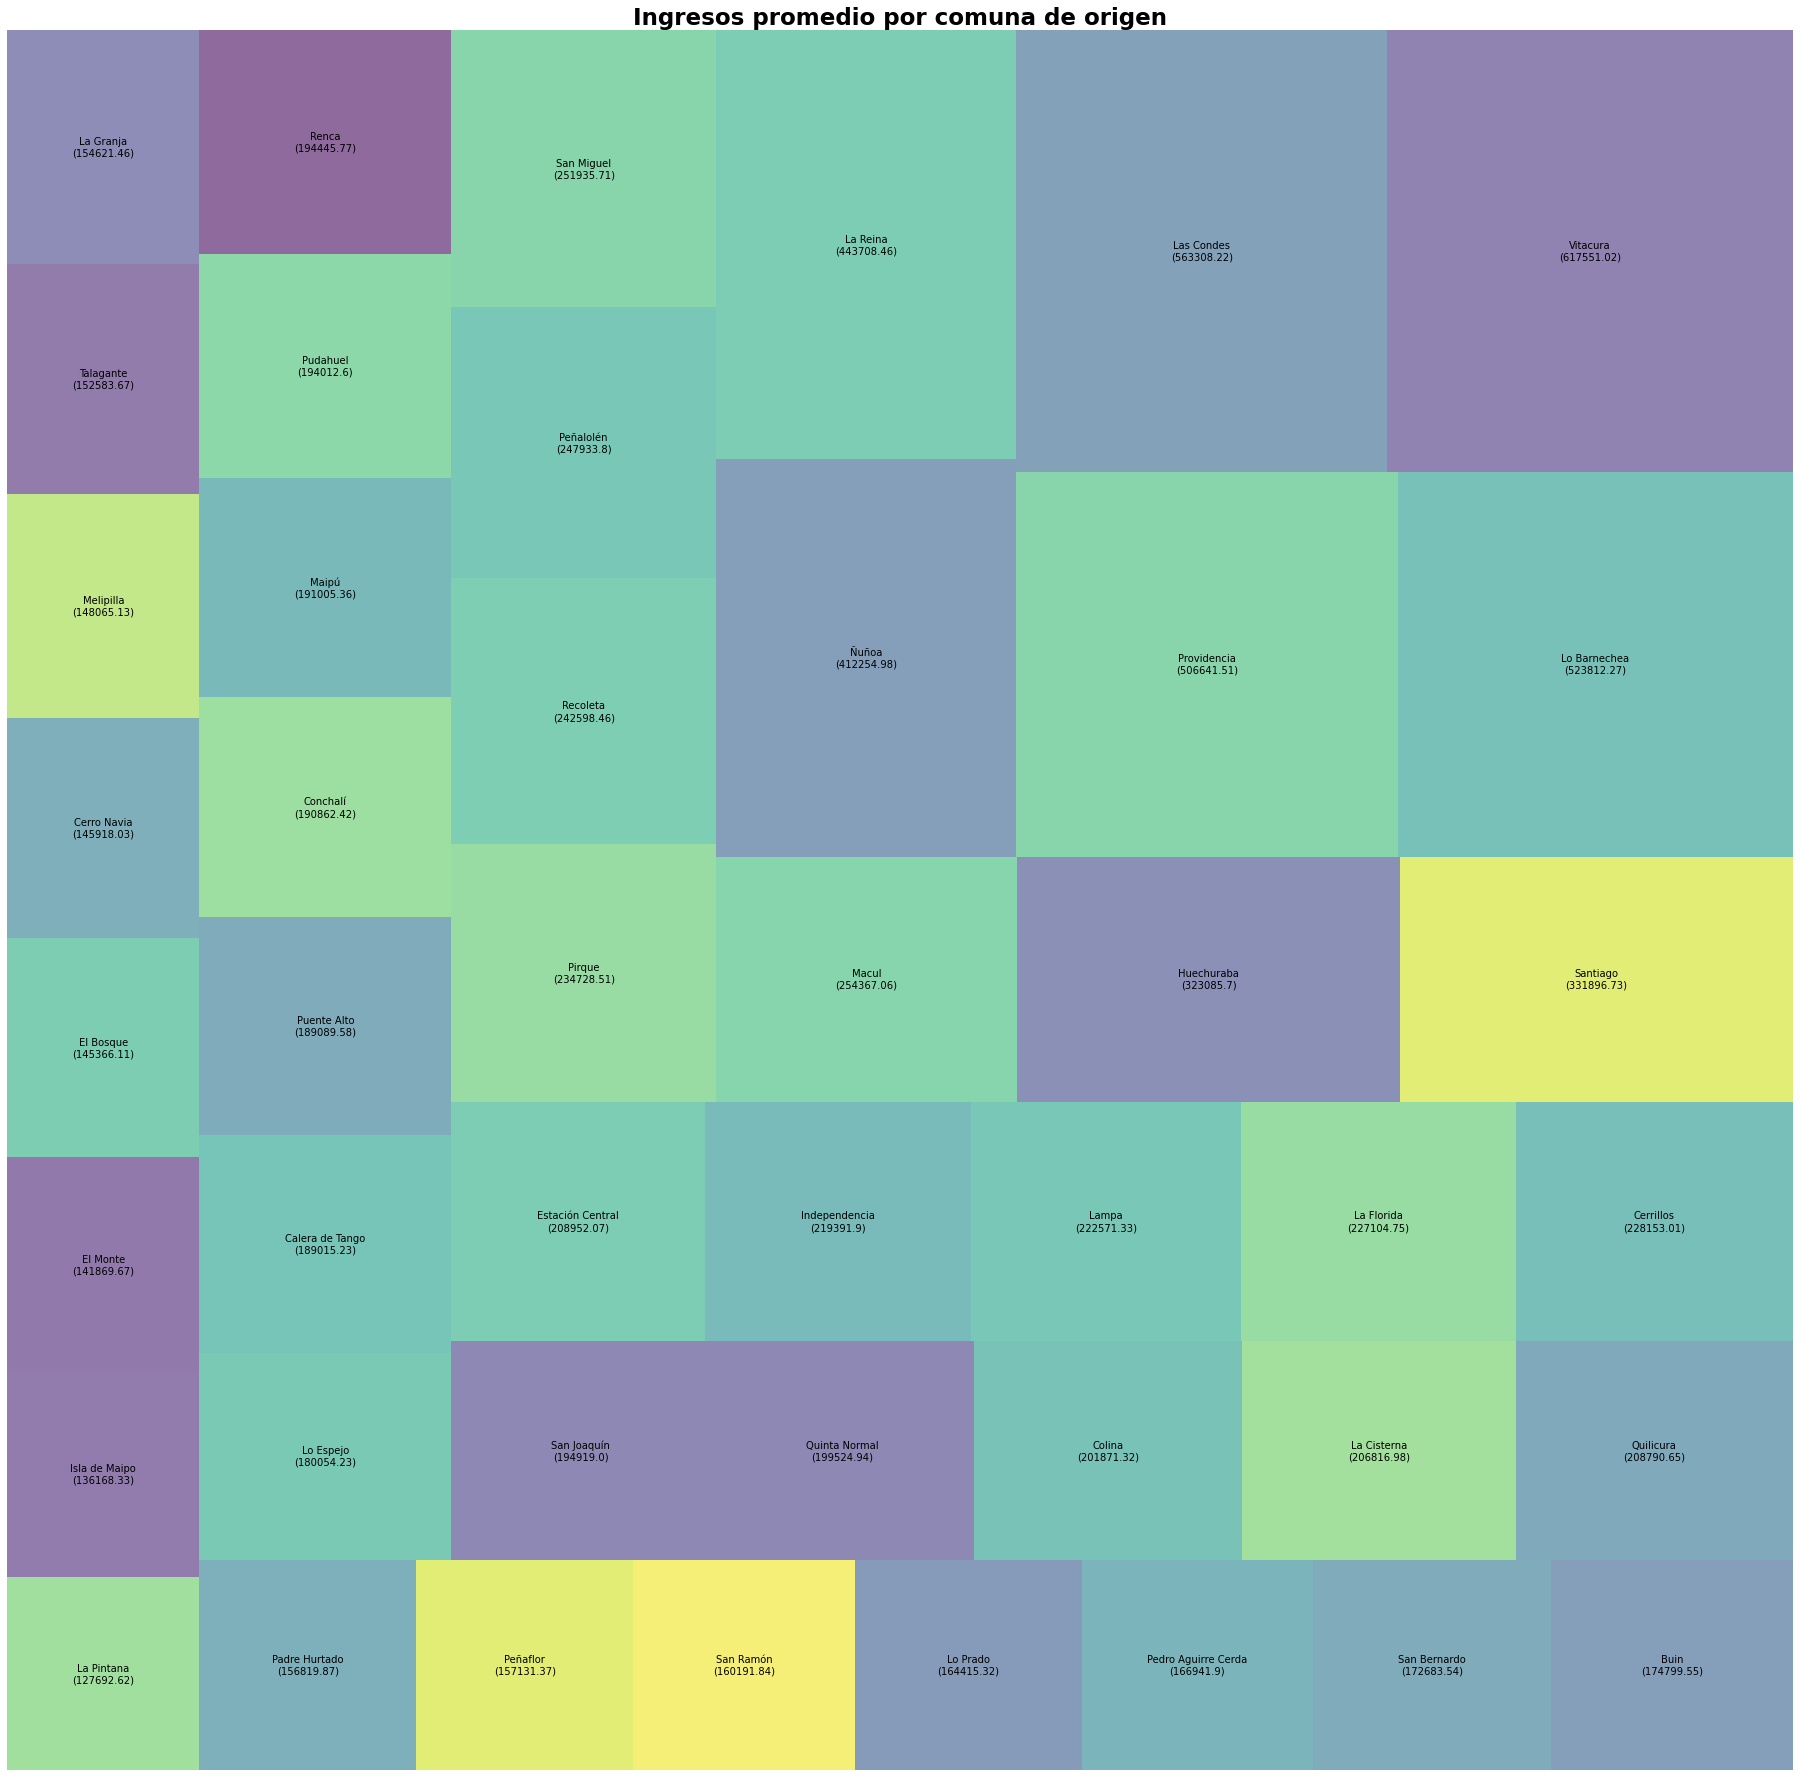

In [4]:
'''
Con la implementacion del metodo drawTreeMapAvgAggr() dentro de aves, podemos renderizar un treemap. Como ejemplo se utilizara la EOD teniendo en cuenta los ingresos promedio por comuna de origen

drawTreeMapAvgAggr(
    dataFrame, 
    columna_de_agrupacion, 
    columna_de_agregacion, 
    impresion_de_margenes, 
    leyenda) 
    

'''

from aves.visualization.treemap import drawTreeMapAvgAggr

drawTreeMapAvgAggr(
    viajes_persona,
    'ComunaOrigen',
    'IngresoFinal',
    False,
    False,
    "legend_class_aggr",
    32,
    32,
    False,
    {'title' : 'Ingresos promedio por comuna de origen', 'fontsize' : 23, 'fontweight': 'bold'})

In [32]:
veh = eod.read_vehicles(EOD_PATH)
veh
#personas

,Hogar,Vehiculo,TipoVeh,MarcaVeh,ModeloVeh,AnoVeh,EdadVehiculo,CilindradaVeh,Combustible,SelloVerde,Propiedad
0,100010,10001001,Auto,37.0,I10,2012.0,1,99999.0,1.0,2,1.0
1,100020,10002001,Auto,72.0,NO SABE,1997.0,4,1600.0,1.0,2,1.0
2,100070,10007001,Camioneta o vehículo todo terreno,65.0,PARTNER,2007.0,2,1900.0,2.0,2,1.0
3,100170,10017001,Auto,17.0,CAVALIER,1998.0,4,2200.0,1.0,2,1.0
4,100170,10017003,Camioneta o vehículo todo terreno,17.0,LUV,1998.0,4,2200.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8882,399891,39989101,Auto,61.0,SENTRA 2,2000.0,4,1600.0,1.0,2,1.0
8883,399911,39991101,Auto,72.0,CLIO,2003.0,3,1300.0,1.0,2,1.0
8884,399921,39992101,Auto,0.0,323,2002.0,3,1600.0,1.0,2,1.0
8885,399931,39993101,Auto,61.0,CENTRA,2001.0,4,1600.0,1.0,2,1.0


In [81]:
#Implementacion plotly
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special
py.offline.init_notebook_mode(connected=True)


In [82]:
personas = eod.read_homes(EOD_PATH)

import plotly.express as px
import numpy as np
fig = px.treemap(
    personas, 
    path=["Sector", 'Comuna'], 
    values='IngresoHogar'
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()